# Machine Learning project - License plate recognition

Architecture

![App schema](screenshots/schema.png)

Imports

In [12]:
import yolov5
from PIL import Image
import pandas as pd
import requests
from io import BytesIO

In [13]:
car_number = 17

### YOLOv5 Model

In [14]:
# load model
model = yolov5.load('keremberke/yolov5m-license-plate')

cars_dataset = pd.read_csv("license.csv")
  
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

# set image
# img = 'https://images.unsplash.com/photo-1571668332486-d0c990361722?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
img = Image.open(f'Cars/car{car_number}.jpg')

# perform inference
results = model(img, size=640)

# inference with test time augmentation
results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]


YOLOv5  2024-3-19 Python-3.10.8 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


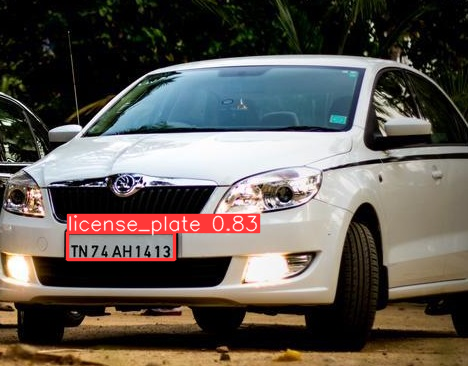

In [15]:
# show detection bounding boxes on image
results.show()

#### Crop selection

In [16]:
def crop_image_from_url(image_url, crop_box):
    # Download the image from the URL
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    # Crop the image using the provided crop box coordinates
    cropped_image = image.crop(crop_box)

    return cropped_image

In [17]:
# Image from URL
# crop_image_from_url(img, tuple(results.xyxy[0][0, :4].squeeze().tolist()[:4]))

# Image from local
img.crop(tuple(results.xyxy[0][0, :4].squeeze().tolist()[:4]))
